In [24]:
# import dependencies for sql
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [25]:
engine = create_engine("sqlite:///.hawaii.sqlite")

In [26]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [27]:
import pandas as pd

In [28]:
Base.classes.keys()

['measurments', 'station']

In [29]:
measurements_df = pd.read_csv('clean_measurements.csv')
stations_df = pd.read_csv('clean_stations.csv')

In [30]:
measurements_df['date'] = pd.to_datetime(measurements_df['date'],format="%Y-%m-%d")

In [31]:
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18103 entries, 0 to 18102
Data columns (total 5 columns):
Unnamed: 0    18103 non-null int64
station       18103 non-null object
date          18103 non-null datetime64[ns]
prcp          18103 non-null float64
tobs          18103 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 707.2+ KB


In [32]:
Measurements = Base.classes.measurments

In [33]:
session = Session(engine)

In [34]:
measurements_df['tobs'][0:5]

0    65
1    63
2    74
3    76
4    70
Name: tobs, dtype: int64

In [35]:
for i in range(len(measurements_df['station'])):
    measure = Measurements(station=measurements_df['station'][i], date=measurements_df['date'][i]\
                               , prcp=measurements_df['prcp'][i], tobs=measurements_df['tobs'][i] )
    session.add(measure)

session.commit()

In [36]:
session.new
Station = Base.classes.station

In [37]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
Unnamed: 0    9 non-null int64
station       9 non-null object
name          9 non-null object
latitude      9 non-null float64
longitude     9 non-null float64
elevation     9 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 512.0+ bytes


In [38]:
for i in range(len(stations_df['station'])):
    station = Station(station=stations_df['station'][i], name=stations_df['name'][i], latitude=stations_df['longitude'][i], \
                     elevation=stations_df['elevation'][i])
    session.add(station)
    
session.commit()

In [39]:
query = "SELECT * FROM measurments"
query_df = pd.read_sql_query(query, session.bind)
query_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,b'A\x00\x00\x00\x00\x00\x00\x00'
1,2,USC00519397,2010-01-02,0.00,b'?\x00\x00\x00\x00\x00\x00\x00'
2,3,USC00519397,2010-01-03,0.00,b'J\x00\x00\x00\x00\x00\x00\x00'
3,4,USC00519397,2010-01-04,0.00,b'L\x00\x00\x00\x00\x00\x00\x00'
4,5,USC00519397,2010-01-07,0.06,b'F\x00\x00\x00\x00\x00\x00\x00'
5,6,USC00519397,2010-01-08,0.00,b'@\x00\x00\x00\x00\x00\x00\x00'
6,7,USC00519397,2010-01-09,0.00,b'D\x00\x00\x00\x00\x00\x00\x00'
7,8,USC00519397,2010-01-10,0.00,b'I\x00\x00\x00\x00\x00\x00\x00'
8,9,USC00519397,2010-01-11,0.01,b'@\x00\x00\x00\x00\x00\x00\x00'
9,10,USC00519397,2010-01-12,0.00,b'=\x00\x00\x00\x00\x00\x00\x00'


In [43]:
query = "select date, max(prcp) from measurments group by date order by date desc limit 365"
precipitation_df = pd.read_sql_query(query, session.bind)


In [47]:
precipitation_df.head()

,date,max(prcp)
0,2017-08-23,0.45
1,2017-08-22,0.50
2,2017-08-21,0.56
3,2017-08-20,0.01
4,2017-08-19,0.09


In [44]:
import numpy as np
import matplotlib.pyplot as plt

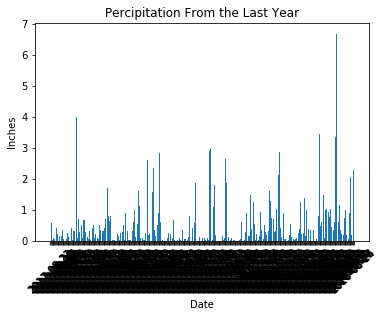

In [59]:
plt.bar(range(365), precipitation_df['max(prcp)'])
plt.xticks(range(365), precipitation_df['date'], rotation=45)
plt.title('Percipitation From the Last Year')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig('Year_Prcp')

In [60]:
query = "select * from station"
query_df = pd.read_sql_query(query, session.bind)
query_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",-157.81680,None,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",-157.80150,None,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",-157.83740,None,7.0
3,4,USC00517948,"PEARL CITY, HI US",-157.97510,None,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",-158.01110,None,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",-157.71139,None,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",-157.84889,None,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",-157.99920,None,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",-157.80250,None,152.4
9,10,USC00519397,"WAIKIKI 717.2, HI US",-157.81680,None,3.0


In [64]:
query = "select count(station) from station"
query_df = pd.read_sql_query(query, session.bind)
query_df
print(query_df)

   count(station)
0              18


In [75]:
query = "select station.station, count(*)\
        from measurments join station\
        on measurments.station = station.station\
        group by station.station order by count(*) desc"
query_df = pd.read_sql_query(query, session.bind)
query_df

,station,count(*)
0,USC00519281,16632
1,USC00513117,16176
2,USC00519397,16110
3,USC00519523,15432
4,USC00516128,14904
5,USC00514830,11622
6,USC00511918,11592
7,USC00517948,4098
8,USC00518838,2052
